In [1]:
import dutchsoils as ds

# DutchSoils structure
DutchSoils has two classes:
* SoilMap:  
    * Downloads the Dutch soil map.
    * Finds the soilprofile at a certain location.
* SoilProfile:  
    * Gives the texture and hydraulic parametrisation (according to the Staring series) of the layers in a SoilProfile.
    * Exports necessary data for [pyswap](https://github.com/zawadzkim/pySWAP).

## Example SoilMap  

NOT YET IMPLEMENTED

## Example SoilProfile

In [2]:
sp = ds.SoilProfile(bofek_cluster=1008)

### Display data

In [3]:
sp.get_data_horizons(which="all")

,layernumber,faohorizonnotation,ztop,zbottom,staringseriesblock,organicmattercontent,organicmattercontent10p,organicmattercontent90p,acidity,acidity10p,...,siltcontent,density,wcres,wcsat,vgmalpha,vgmnpar,vgmlambda,ksatfit,staringblockdescription,staringblocklabel
0,1,Ahg,0.00,0.10,B17,20.0,10.0,30.0,5.0,4.5,...,35,0.641,0.00,0.718626,0.019062,1.136658,0.000100,4.483735,venige klei,venige klei
1,2,Cwg,0.10,0.35,O13,7.0,5.0,30.0,5.0,4.5,...,35,1.044,0.01,0.573268,0.027854,1.079952,-6.091311,9.689291,zeer zware klei,z.zw. klei
2,3,Cw,0.35,0.80,O17,75.0,60.0,90.0,5.0,4.7,...,57,0.232,0.01,0.848635,0.011929,1.271536,-1.249300,3.402009,mesotroof en eutroof veen,meso-eutroof veen
3,4,BCb,0.80,0.95,O01,3.0,1.0,8.0,4.8,4.5,...,6,1.545,0.01,0.365847,0.015987,2.162751,2.867967,22.322154,leemarm zeer fijn tot matig fijn zand,leemarm z.f.-m.f. zand
4,5,Cu,0.95,1.20,O01,0.4,0.1,3.0,4.8,4.5,...,6,1.668,0.01,0.365847,0.015987,2.162751,2.867967,22.322154,leemarm zeer fijn tot matig fijn zand,leemarm z.f.-m.f. zand


### Plot profile

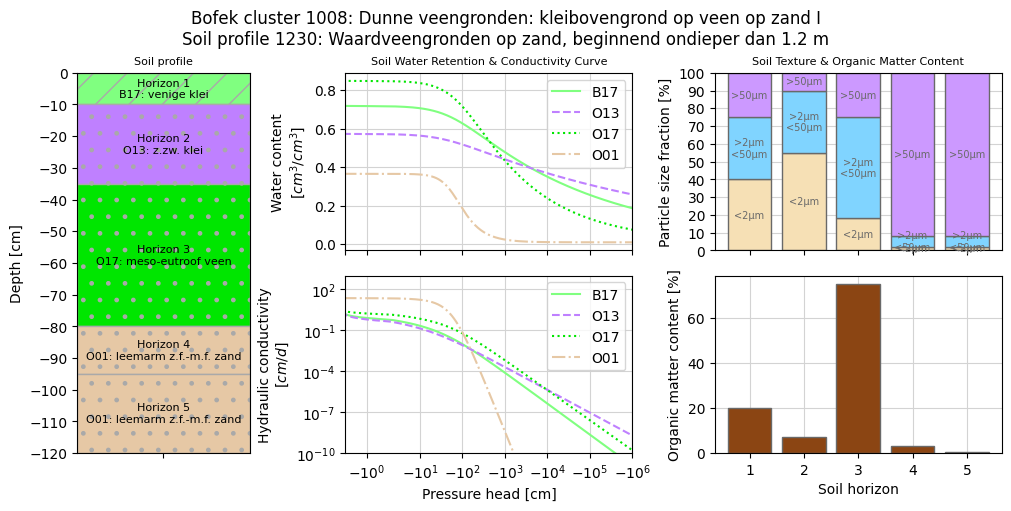

In [4]:
sp.plot(merge_layers=False)

In [5]:
sp.get_swapinput_profile(
    discretisation_compheights=[1, 2, 5, 10, 20],
    discretisation_depths=[10, 20, 30, 40, 100]
)

{'ISUBLAY': [1, 2, 3, 4, 5, 6, 7, 8],
 'ISOILLAY': [1, 1, 2, 2, 3, 4, 4, 4],
 'HSUBLAY': [11, 4, 1, 14, 20, 10, 40, 100],
 'HCOMP': [1, 2, 1, 2, 5, 5, 10, 20],
 'NCOMP': [11, 2, 1, 7, 4, 2, 4, 5]}